#  Huấn luyện và lưu các mô hình chuẩn bị cho dự đoán

- KNN
- Navie Bayes
- Random Forest
- Logistic Regression

Dựa vào biểu đồ chọn K (sô thuộc tính) khi PCA được vẽ ở file preprocess.ipynb nên chọn k=5

In [4]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

df = pd.read_csv('data/normalized_dry_bean_dataset.csv', sep=',')
y = df['Class']
X = df.drop(columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape    

((10884, 17), (10884,))

In [5]:
# k = 5
# pca = PCA(n_components=k)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

## Mô hình KNN

Giá trị K tốt nhất tìm được: 13 (Độ chính xác: 0.9280)


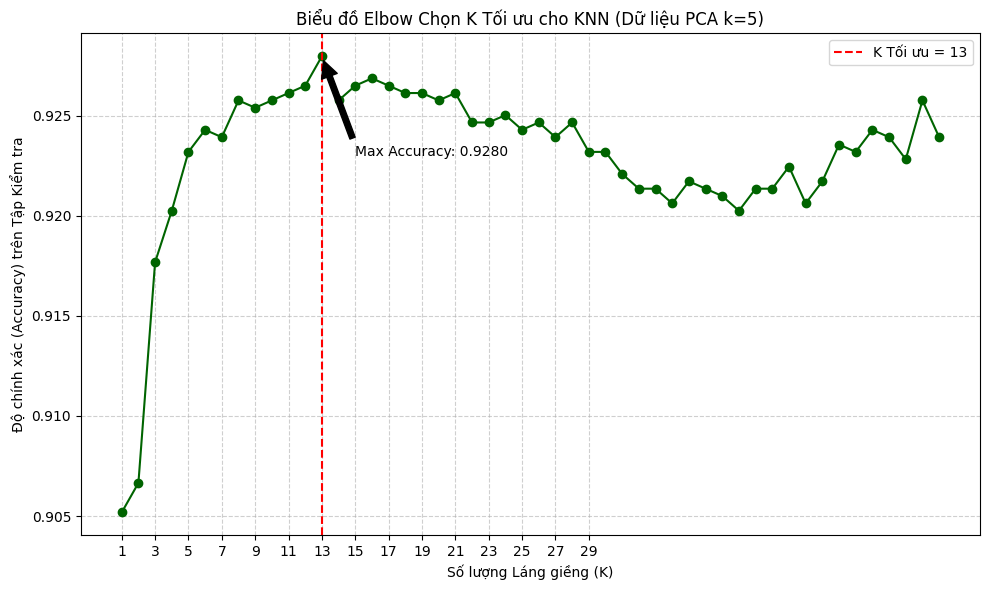

In [6]:
from sklearn.neighbors import KNeighborsClassifier


accuracies = []
k_range = range(1, 51)

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Tìm giá trị K tốt nhất
best_k = k_range[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)

print(f"Giá trị K tốt nhất tìm được: {best_k} (Độ chính xác: {best_accuracy:.4f})")

# Vẽ Biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='-', color='darkgreen')
plt.title('Biểu đồ Elbow Chọn K Tối ưu cho KNN (Dữ liệu PCA k=5)')
plt.xlabel('Số lượng Láng giềng (K)')
plt.ylabel('Độ chính xác (Accuracy) trên Tập Kiểm tra')
plt.xticks(np.arange(1, 31, 2))
plt.grid(True, linestyle='--', alpha=0.6)

# Đánh dấu điểm K tốt nhất
plt.axvline(x=best_k, color='red', linestyle='--', label=f'K Tối ưu = {best_k}')
plt.annotate(
    f'Max Accuracy: {best_accuracy:.4f}',
    xy=(best_k, best_accuracy),
    xytext=(best_k + 2, best_accuracy - 0.005),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10
)
plt.legend()
plt.tight_layout()
plt.show()

Theo biểu đồ thì k tốt là 12 nhưng do hạn chế chọn số chẵn làm k nên sẽ chọn k = 13

In [7]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Lưu mô hình KNN
with open('models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

KNN Classification Report:
               precision    recall  f1-score   support

         BAR       0.00      0.00      0.00         1
    BARBUNYA       0.97      0.87      0.91       260
      BOMBAY       1.00      1.00      1.00       115
        CALI       0.90      0.96      0.93       315
    DERMASON       0.93      0.92      0.93       703
       HOROZ       0.97      0.95      0.96       382
       SEKER       0.95      0.95      0.95       410
        SIRA       0.86      0.91      0.88       531
         Sek       0.00      0.00      0.00         1
        sira       0.00      0.00      0.00         3

    accuracy                           0.93      2721
   macro avg       0.66      0.66      0.66      2721
weighted avg       0.93      0.93      0.93      2721

KNN Accuracy: 0.9279676589489159


c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

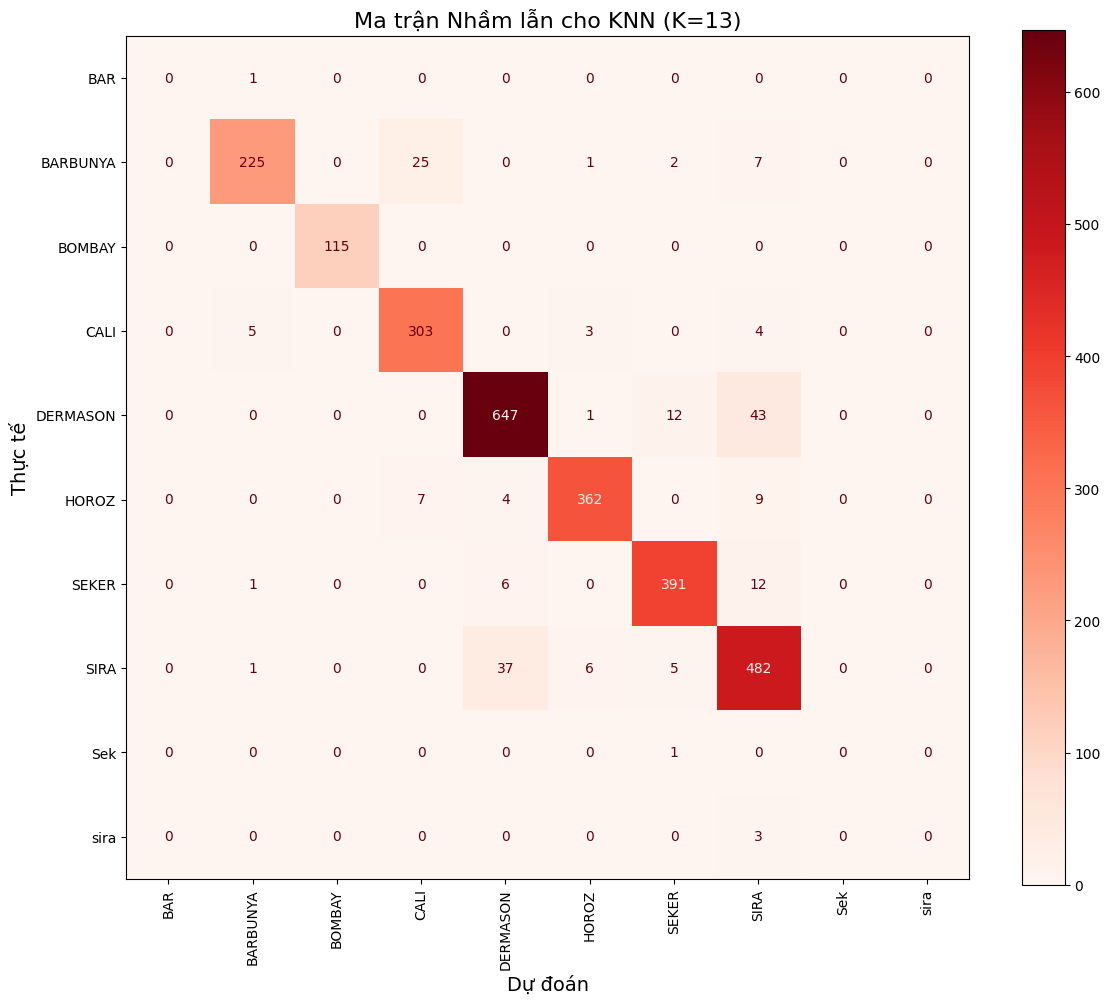

In [8]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    knn, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho KNN (K=13)', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()

## Mô hình Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))

with open('models/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

         BAR       0.00      0.00      0.00         1
    BARBUNYA       0.87      0.75      0.81       260
      BOMBAY       0.98      1.00      0.99       115
        CALI       0.87      0.91      0.89       315
    DERMASON       0.94      0.86      0.90       703
       HOROZ       0.95      0.96      0.95       382
       SEKER       0.93      0.91      0.92       410
        SIRA       0.80      0.87      0.84       531
         Sek       0.00      0.00      0.00         1
        sira       0.30      1.00      0.46         3

    accuracy                           0.88      2721
   macro avg       0.66      0.73      0.68      2721
weighted avg       0.90      0.88      0.89      2721

Gaussian Naive Bayes Accuracy: 0.8831312017640573


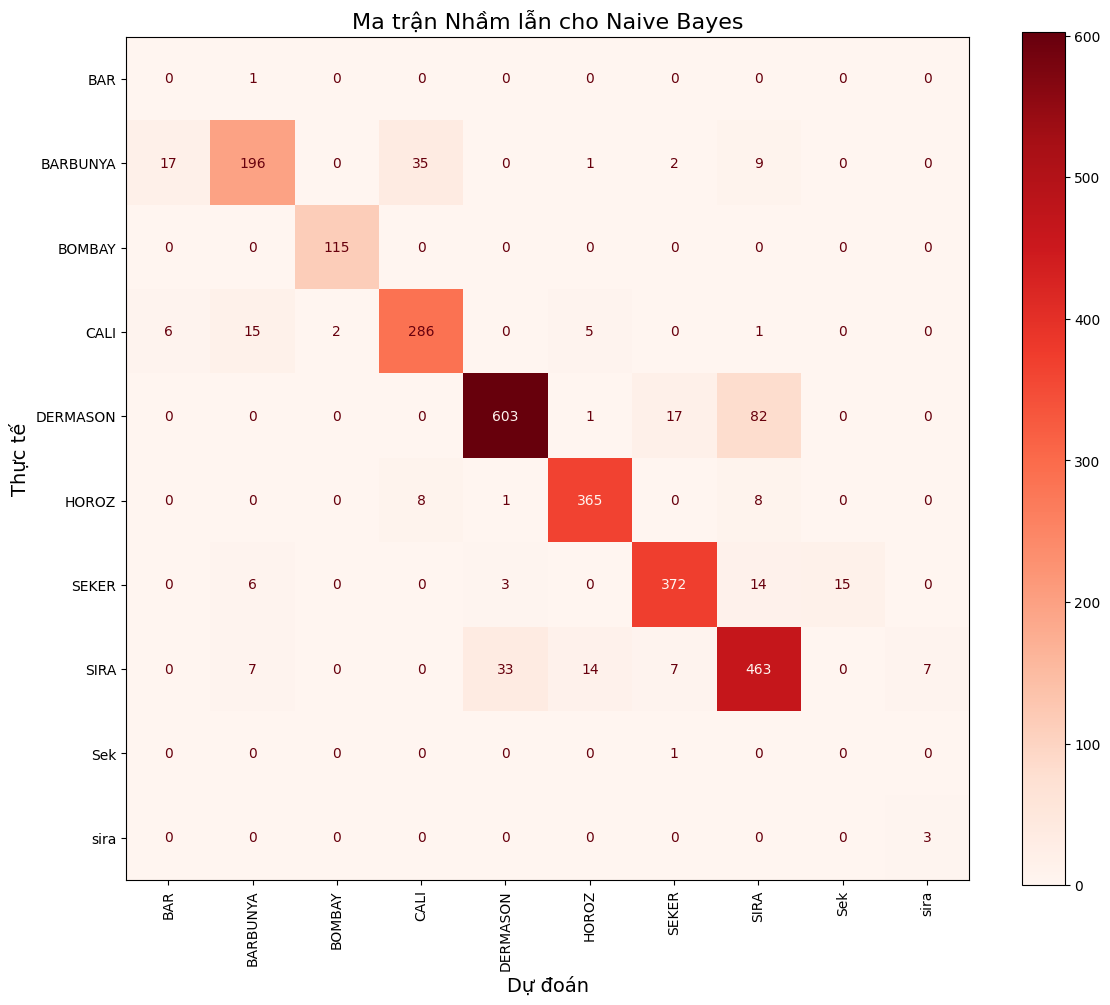

In [10]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    gnb, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho Naive Bayes', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()

## Mô hình Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion="entropy", min_samples_leaf=7, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

with open('models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

Random Forest Classification Report:
               precision    recall  f1-score   support

         BAR       0.00      0.00      0.00         1
    BARBUNYA       0.93      0.88      0.91       260
      BOMBAY       1.00      0.99      1.00       115
        CALI       0.91      0.96      0.93       315
    DERMASON       0.92      0.93      0.93       703
       HOROZ       0.97      0.94      0.95       382
       SEKER       0.96      0.94      0.95       410
        SIRA       0.87      0.89      0.88       531
         Sek       0.00      0.00      0.00         1
        sira       1.00      0.33      0.50         3

    accuracy                           0.92      2721
   macro avg       0.76      0.69      0.70      2721
weighted avg       0.92      0.92      0.92      2721

Random Forest Accuracy: 0.9246600514516722


c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

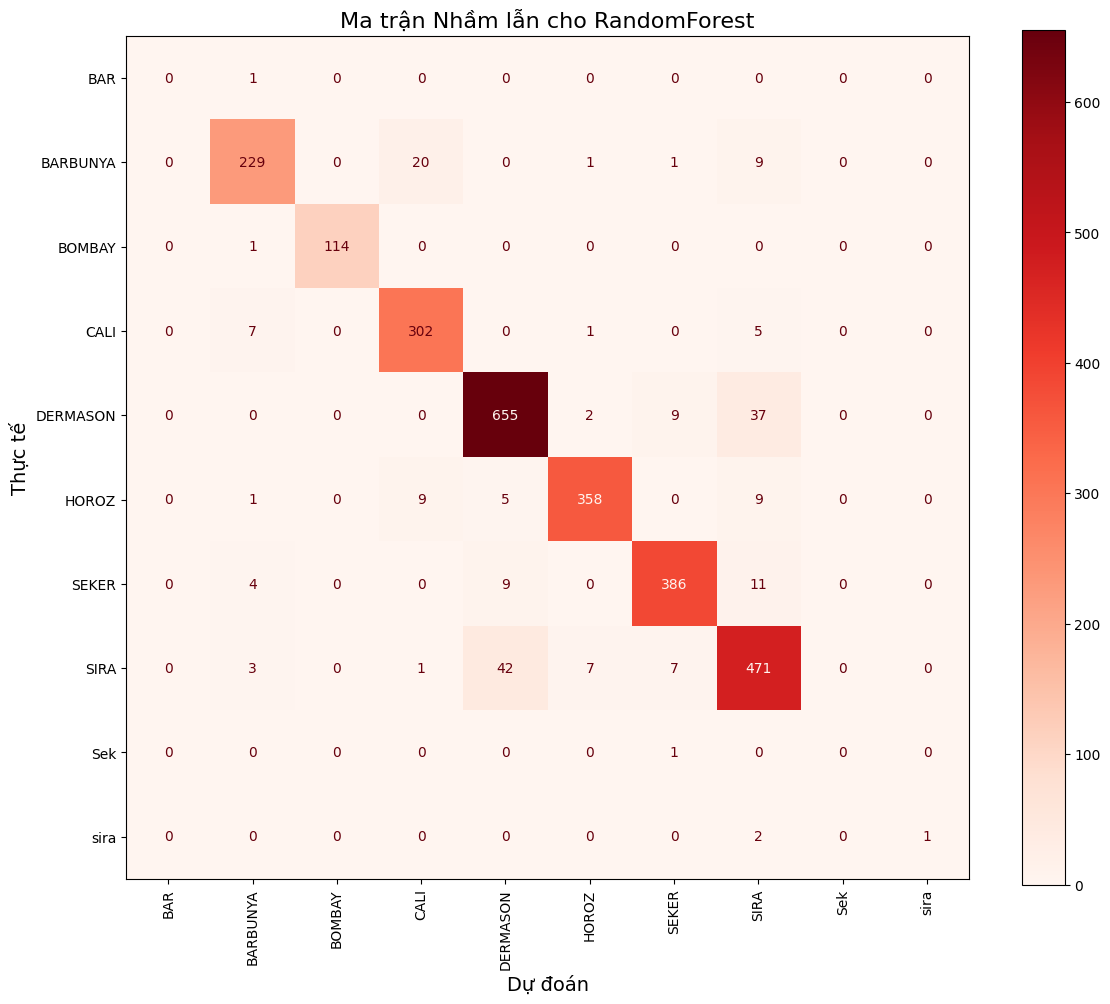

In [12]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    rf, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho RandomForest', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()

## Mô hình Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

with open('models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         BAR       0.00      0.00      0.00         1
    BARBUNYA       0.96      0.86      0.91       260
      BOMBAY       1.00      0.99      1.00       115
        CALI       0.90      0.96      0.93       315
    DERMASON       0.93      0.89      0.91       703
       HOROZ       0.96      0.95      0.95       382
       SEKER       0.94      0.94      0.94       410
        SIRA       0.82      0.90      0.86       531
         Sek       0.00      0.00      0.00         1
        sira       0.00      0.00      0.00         3

    accuracy                           0.92      2721
   macro avg       0.65      0.65      0.65      2721
weighted avg       0.92      0.92      0.92      2721

Logistic Regression Accuracy: 0.9158397647923557


c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

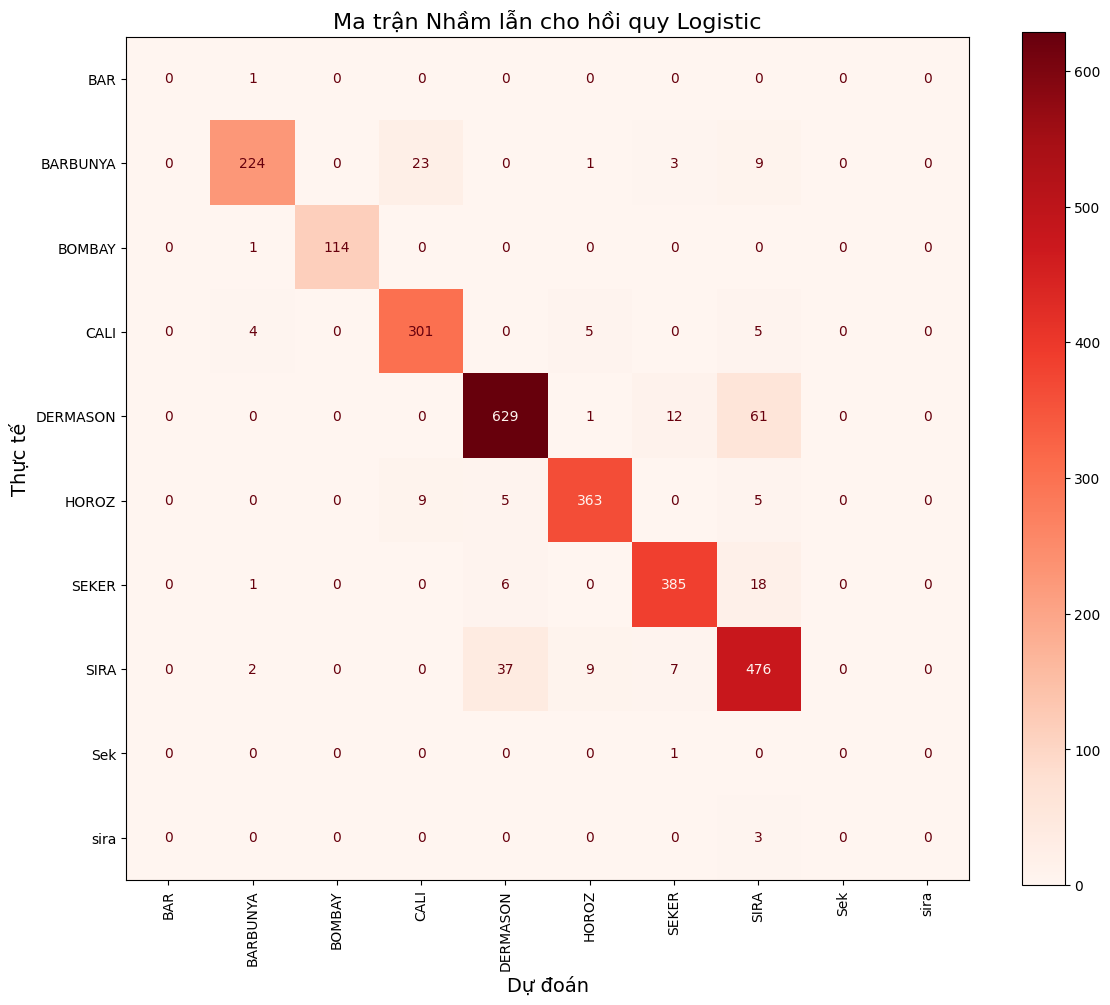

In [14]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    log_reg, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho hồi quy Logistic', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()

## Mô hình SVM (SupportVectorMachine)

In [15]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

with open('models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

SVM Classification Report:
               precision    recall  f1-score   support

         BAR       0.00      0.00      0.00         1
    BARBUNYA       0.96      0.87      0.91       260
      BOMBAY       1.00      1.00      1.00       115
        CALI       0.91      0.96      0.93       315
    DERMASON       0.93      0.91      0.92       703
       HOROZ       0.97      0.95      0.96       382
       SEKER       0.95      0.94      0.95       410
        SIRA       0.84      0.90      0.87       531
         Sek       0.00      0.00      0.00         1
        sira       0.00      0.00      0.00         3

    accuracy                           0.92      2721
   macro avg       0.65      0.65      0.65      2721
weighted avg       0.92      0.92      0.92      2721

SVM Accuracy: 0.9206174200661521


c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thanh\anaconda3\envs\kkdl\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

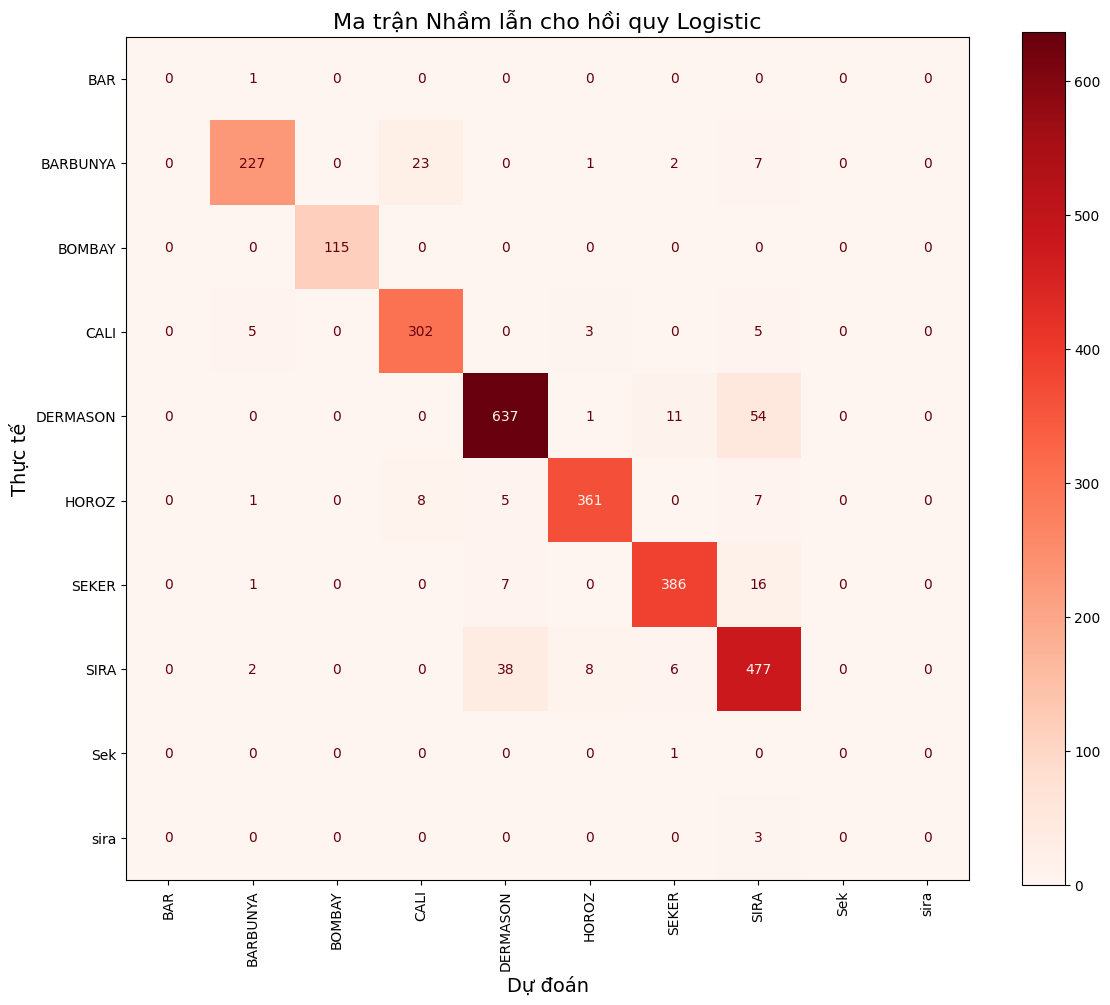

In [16]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    svm_model, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho hồi quy Logistic', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()